<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/mateuszszczepanek/best-body-height-or-weight"><img src="https://cdn.iconscout.com/icon/free/png-128/kaggle-3628869-3030009.png" />Open in Kaggle</a>
  </td>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(filepath_or_buffer="../input/weight-height/weight-height.csv")
df.sample(3)

,Gender,Height,Weight
5082,Female,63.584310,133.189404
8003,Female,56.105370,87.298869
3137,Male,69.923714,207.074913


#### Checking how many womens and mens. 

In [3]:
df.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

#### Change 'Weight' from pounds to kilograms.

In [4]:
df.Weight /= 2.2046

#### Change 'Height' from inches to centimeters.

In [5]:
df.Height *= 2.54

#### Change 'Gender' into binary.

In [6]:
df.Gender = df.Gender.map({"Female" : 1, "Male" : 0})

In [7]:
df.sample(n=10)

,Gender,Height,Weight
7113,1,157.811642,56.828213
6833,1,152.202291,56.947831
2442,0,175.169492,82.344947
9689,1,167.230564,65.230242
8350,1,166.919088,71.528237
5788,1,163.395464,63.585806
86,0,169.154339,94.504987
3287,0,175.862111,89.612642
9584,1,156.407326,55.585470
3488,0,160.720784,74.641139


### Normal distribution

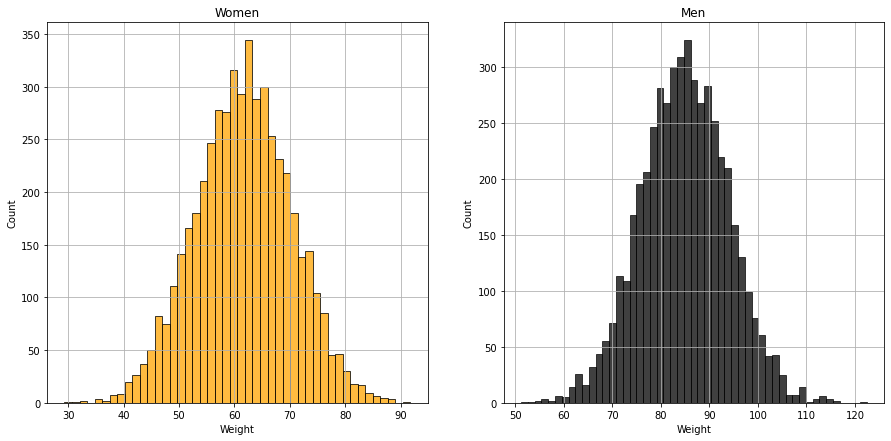

In [8]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))

sns.histplot(df.query("Gender==1").Weight, ax=ax1, color="orange")

sns.histplot(df.query("Gender==0").Weight, ax=ax2, color="k")
ax1.set_title("Women")
ax2.set_title("Men")
ax1.grid()
ax2.grid()
plt.show()

# Best body height

In [9]:
model_height = LinearRegression()
X = df[ ["Weight", "Gender"] ]
y = df[ ["Height"] ]
model_height.fit(X, y)

LinearRegression()

In [10]:
YOUR_WEIGHT = 85
YOUR_GENDER = 0 # Put 0 for Man, 1 for Woman


if 30 <= YOUR_WEIGHT <= 230 and YOUR_GENDER in [0,1]:
    print(f"Your best height is {model_height.predict([ [YOUR_WEIGHT, YOUR_GENDER] ] )[0][0]:.0f} cm.")
else:
    print("Put correct values!")

Your best height is 175 cm.


# Best body weight

In [11]:
model_weight = LinearRegression()
X = df[ ["Height", "Gender"] ]
y = df[ ["Weight"] ]
model_weight.fit(X, y)

LinearRegression()

In [12]:
YOUR_HEIGHT = 148
YOUR_GENDER = 1 # Put 0 for Man, 1 for Woman

if 50 <= YOUR_HEIGHT <= 240 and YOUR_GENDER in [0,1]:
    print(f"Your best weight is {model_weight.predict([ [YOUR_HEIGHT, YOUR_GENDER] ] )[0][0]:.0f} kg.")
else:
    print("Put correct values!")

Your best weight is 47 kg.
